# MSA 2023 Phase 2 - Part 2

In [94]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and split preprocessed data

In [95]:
MarketData = pd.read_csv('PreprocessedMarketData.csv')
MarketData = MarketData.drop('Unnamed: 0', axis=1)
MarketData.head()

,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.247191,0,0.071429,1,0.444444,D,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0.752809,1,0.071429,1,0.111111,B,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0.752809,1,0.000000,3,0.222222,B,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,1,0.629213,0,0.000000,2,0.222222,C,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0.359551,1,0.071429,1,0.333333,C,0,0,...,0,0,0,0,0,0,0,0,1,0


The data consists of the following   
boolean values (1 for yes, 0 for no) for: Is_Male, Ever_Married, Graduated, all of the professions, and the values of 'Var_1'.
The last two are from one-hot vectors meaning for each type only one value is true, all of these names are self describing, apart from Var_1 which I do not understand    
As well as this there are numerical values which have been normalised for: Age, Work_Experience and Family_Size    
The market segments are a categorical value from A through D    
The spending score is ordinal data, with 1 being low, 2 being average, and 3 being high


In [96]:
from sklearn.model_selection import train_test_split
# Create an 70-30 train-test split on the dataset
y = MarketData['Segmentation']
X = MarketData.drop('Segmentation', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



## 2. Choose an algorithm

I have decided to use random forest for this classification model as it should have enough complexity to do well in the dataset while still being one covered in the MSlearn course and reasonable to train.    

The model works by creating a large amount of decision trees and then running them all on a given input, and taking the most common output of the trees to create its' output. A singular decision tree is a simple model trained by partitioning the dataset through simple questions (such as "is age > 0.5", meaning in this case is their age above average) to best devide the dataset by the output col. This however is prone to overfitting, so by using many trees we attempt to cancel out the overfitting 

## 3. Train and test a model

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

model = RandomForestClassifier()
model = model.fit(X_train, y_train)

In [98]:
y_pred = model.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4755


The result is around 48% on running this model, while not very high accuracy this is still signifigantly better than random (we would expect 25%)

## 4. Evaluate the model 

In [100]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[205  97  62 109]
 [115 133 156  68]
 [ 65 129 271  55]
 [106  52  35 342]]


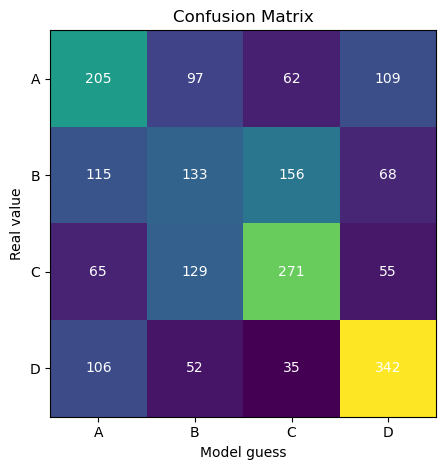

In [101]:

Segment = ['A','B','C','D']


fig, ax = plt.subplots()
im = ax.imshow(cm)

#Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Segment)), labels=Segment)


# Loop over data dimensions and create text annotations.
for i in range(len(Segment)):
    for j in range(len(cm)):
        text = ax.text(j, i, cm[i][j],ha="center", va="center", color="w")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Model guess")
ax.set_ylabel("Real value")
fig.tight_layout()
plt.show()

From a cursory glance we can see the model does best for D and closely behind on A and C, but struggles with B

In [102]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           A       0.42      0.43      0.43       473
           B       0.32      0.28      0.30       472
           C       0.52      0.52      0.52       520
           D       0.60      0.64      0.62       535

    accuracy                           0.48      2000
   macro avg       0.46      0.47      0.47      2000
weighted avg       0.47      0.48      0.47      2000



Here we get confirmation of this, D has an f1-score of around 60%, C and A are around 50% and 40% respectively with B at around 30%, not much better than random. 

## 5. Summary